In [1]:
import itertools
import os
import sys
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from collections import Counter

from gensim.corpora.dictionary import Dictionary

# import plotly
# import plotly.plotly as py
# import plotly.offline as offline
# import plotly.graph_objs as go
from nltk.tokenize import word_tokenize


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [2]:
# read in data
# ----------------------------------
lines = pd.read_csv("/Users/dan/Documents/talk/the_office_area_plot/data/the_office_lines.csv", index_col=None)
lines.head()


,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [3]:
# Convert season to string data type
# ----------------------------------
lines['season'] = lines['season'].astype(str)
lines.dtypes


id            int64
season       object
episode       int64
scene         int64
line_text    object
speaker      object
deleted        bool
dtype: object

In [4]:
# Word Tokenize
# --------
def word_token_lines(row):
    '''text preprocessing function

    1. remove stage instructions in brackets
    2. trim white space
    3. tokenize
    4. remove special characters
    5. remove stopwords
    6. stem all words

    arg:
        row of a df

    return:
        clean, tokenized row
    '''

    # remove stage instructions in brackets
    no_brackets = re.sub("[\(\[].*?[\)\]]", "", row.line_text)

    # trim white space
    no_white = no_brackets.strip()

    # tokenize words
    word_tokens = nltk.word_tokenize(no_white)

    # lowercase all words
    lower_tokens = [token.lower() for token in word_tokens]

    # remove special characters
    alpha_only = [token for token in lower_tokens
                    if token.isalpha()]

    # remove i, but, you, as, etc. (stopwords)
    no_stops = [token for token in alpha_only
                    if token not in stopwords.words('english')]

    # stem all words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in no_stops]

    return lemmatized


def word_token_loop(df):
    # for loop to tokenize each row
    df['word_token'] = df.apply(word_token_lines, axis=1)
    return df


lines_word_token = word_token_loop(lines)
lines_word_token.head()

,id,season,episode,scene,line_text,speaker,deleted,word_token
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False,"[right, jim, quarterly, look, good, thing, lib..."
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,"[oh, told, could, close]"
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False,"[come, master, guidance, saying, grasshopper]"
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,"[actually, called, yeah]"
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,"[right, well, let, show, done]"


In [5]:
# Speaker Tokenize
# --------
def word_token_speaker(row):
    '''text preprocessing function

    1. remove stage instructions in brackets
    2. trim white space
    3. tokenize
    4. remove special characters

    arg:
        row of a df

    return:
        clean, tokenized row
    '''

    # remove stage instructions in brackets
    no_brackets = re.sub("[\(\[].*?[\)\]]", "", row.speaker)

    # trim white space
    no_white = no_brackets.strip()

    # tokenize words
    word_tokens = nltk.word_tokenize(no_white)

    # lowercase all words
    lower_tokens = [token.lower() for token in word_tokens]

    # remove special characters
    alpha_only = [token for token in lower_tokens
                    if token.isalpha()]

    return alpha_only


def word_speaker_loop(df):
    # for loop to tokenize each row
    df['word_token_speaker'] = df.apply(word_token_speaker, axis=1)
    return df


lines_word_speaker = word_speaker_loop(lines_word_token)
lines_word_speaker.head()

,id,season,episode,scene,line_text,speaker,deleted,word_token,word_token_speaker
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False,"[right, jim, quarterly, look, good, thing, lib...",[michael]
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,"[oh, told, could, close]",[jim]
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False,"[come, master, guidance, saying, grasshopper]",[michael]
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,"[actually, called, yeah]",[jim]
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,"[right, well, let, show, done]",[michael]


In [6]:
# lines_word_token['word_token'].head()

# i think onion to convert this1 column into a flat lreverseist and then the bag of words counter will work

# Create the bag-of-words: bow
# bow = Counter(lines_word_token['word_token'].to_list())
# stacked_list = lines_word_token['word_token'].head(1000).to_list()
# print(stacked_list)
# flat_list = [sentence for sub_list in stacked_list for sentence in sub_list]
# print(flat_list)

# bow = Counter(flat_list)
# Print the 10 most common tokens
# print(bow.most_common(10))


In [7]:

# lines_word_token['word_token'] = lines_word_token['word_token'].astype(str)
# lines_word_token['word_token_speaker'] = lines_word_token['word_token_speaker'].astype(str)
# grouped_lines = lines_word_token.groupby(['word_token_speaker'])['word_token'].apply(','.join).reset_index()
# lines_word_token.dtypes

In [8]:
# grouped_lines.to_csv('speaker_group_by.csv', index=False)
# lines_word_token.to_csv('lines_no_group.csv', index=False)

In [9]:
# grouped_lines['speaker'] = grouped_lines['value'].str[0]
lines_word_speaker['word_token_speaker'] = lines_word_speaker['word_token_speaker'].astype(str)
michael = lines_word_speaker[lines_word_speaker['speaker'] == 'Michael']
michael_list = michael['word_token'].to_list()
#print(michael_list)
# print(michael)
# michael.head()
# lines_word_speaker.head()
# michael = grouped_lines[grouped_lines['word_token_speaker'] == "['michael']"]
# michael['word_token'] = michael['word_token'].str.get(0)
# stacked_list = michael['word_token'].to_list()
# double_stacked = stacked_list.to_list()

michael_flat_list = [sentence for sub_list in michael_list for sentence in sub_list]
print(michael_flat_list)
# michael.to_csv('michael.csv', index=False)
# with open('your_file.txt', 'w') as f:
#     for item in michael_flat_list:
#         f.writelines(item)
# michael.head()



['right', 'jim', 'quarterly', 'look', 'good', 'thing', 'library', 'come', 'master', 'guidance', 'saying', 'grasshopper', 'right', 'well', 'let', 'show', 'done', 'yes', 'like', 'speak', 'office', 'manager', 'please', 'yes', 'hello', 'michael', 'scott', 'regional', 'manager', 'dunder', 'mifflin', 'paper', 'product', 'wanted', 'talk', 'right', 'done', 'deal', 'thank', 'much', 'sir', 'gentleman', 'scholar', 'oh', 'sorry', 'ok', 'sorry', 'mistake', 'woman', 'talking', 'low', 'voice', 'probably', 'smoker', 'way', 'done', 'uh', 'dunder', 'mifflin', 'year', 'last', 'four', 'regional', 'manager', 'want', 'come', 'see', 'entire', 'floor', 'kingdom', 'far', 'eye', 'see', 'receptionist', 'pam', 'pam', 'pam', 'beesly', 'pam', 'u', 'forever', 'right', 'pam', 'think', 'cute', 'seen', 'couple', 'year', 'ago', 'message', 'oh', 'pam', 'corporate', 'many', 'time', 'told', 'special', 'filing', 'cabinet', 'thing', 'corporate', 'called', 'wastepaper', 'basket', 'look', 'look', 'face', 'people', 'say', 'best

In [10]:
def get_character_list(df, character_name):
    character_df = df[df['speaker'] == character_name]
    character_list = character_df['word_token'].to_list()
    character_flat_list = [sentence for sub_list in character_list for sentence in sub_list]

    return character_flat_list


characters = ['Michael',
              'Dwight',
              'Jim',
              'Pam',
              'Andy',
              'Angela',
              'Kevin',
              'Ryan',
              'Erin',
              'Oscar',
              'Darryl',
              'Kelly',
              'Jan',
              'Toby',
              'Phyllis',
              'Nellie',
              'Stanley',
              'Gabe',
              'Robert',
              'Holly',
              'Meredith',
              'Creed',
              'David Wallace',
              'Todd Packer']


character_corpus = []
for character in characters:
    character_list = get_character_list(lines_word_speaker, character)
    character_corpus.append(character_list)


print(character_corpus[23])


['hey', 'big', 'queen', 'hey', 'old', 'godzillary', 'coming', 'today', 'meaning', 'ask', 'one', 'question', 'carpet', 'match', 'drape', 'mello', 'michael', 'scott', 'secret', 'lover', 'intercom', 'told', 'never', 'call', 'never', 'bergerstein', 'bergerstein', 'want', 'money', 'back', 'greedy', 'hebrew', 'bergerstein', 'ca', 'make', 'coming', 'oh', 'god', 'stop', 'whining', 'know', 'come', 'pick', 'game', 'year', 'little', 'bitch', 'right', 'yup', 'hey', 'okay', 'problem', 'know', 'best', 'hey', 'know', 'hey', 'nice', 'talking', 'right', 'take', 'care', 'michael', 'scoot', 'funny', 'good', 'friend', 'two', 'thumb', 'like', 'bone', 'mom', 'guy', 'bleep', 'bleep', 'halpert', 'still', 'queer', 'kidding', 'everyone', 'know', 'know', 'okay', 'check', 'al', 'lright', 'story', 'randall', 'nailing', 'secretary', 'right', 'totally', 'incompetent', 'talking', 'blonde', 'incompetent', 'like', 'word', 'minute', 'talking', 'woman', 'right', 'said', 'suddenly', 'reason', 'bimbo', 'blow', 'whistle', '

In [11]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(character_corpus)
print(dictionary)

Dictionary(15829 unique tokens: ['aaaaaaaa', 'aaaaaand', 'aaaaeeexcellent', 'aaaah', 'aaaahh']...)


In [12]:
computer_id = dictionary.token2id.get("computer")
# print(computer_id)
print(dictionary.get(computer_id))

computer


In [13]:
corpus = [dictionary.doc2bow(character) for character in character_corpus]
print(corpus[0][:10])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1)]


In [30]:
doc = corpus[0]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

# Create the defaultdict: total_word_count
# look upwards here using this default dictionary
# total_word_count = nltk.defaultdict(int)
# for word_id, word_count in itertools.chain.from_iterable(corpus):
#     total_word_count[word_id] += word_count

know 1399
oh 1006
okay 975
like 887
right 816


In [90]:
bow_doc

[(4023, 1399),
 (4955, 1006),
 (4965, 975),
 (4187, 887),
 (6028, 816),
 (7894, 805),
 (3067, 800),
 (3078, 729),
 (3086, 716),
 (3024, 697),
 (8097, 629),
 (7824, 626),
 (7285, 615),
 (8053, 603),
 (8116, 559),
 (3384, 531),
 (4978, 522),
 (1440, 503),
 (4154, 469),
 (4733, 458),
 (3221, 430),
 (2281, 425),
 (6212, 405),
 (5233, 392),
 (4963, 390),
 (5798, 390),
 (5120, 381),
 (7283, 369),
 (7329, 360),
 (6307, 357),
 (4782, 355),
 (4251, 344),
 (3083, 339),
 (3103, 330),
 (1654, 328),
 (7551, 308),
 (7540, 307),
 (504, 306),
 (4217, 290),
 (2511, 283),
 (4337, 283),
 (3073, 281),
 (7150, 281),
 (6695, 271),
 (3147, 269),
 (1855, 266),
 (3882, 265),
 (7215, 261),
 (1053, 258),
 (8031, 258),
 (218, 254),
 (4277, 248),
 (7262, 240),
 (5370, 239),
 (3049, 226),
 (7856, 222),
 (7534, 214),
 (4351, 211),
 (4949, 208),
 (1067, 187),
 (2908, 185),
 (7352, 184),
 (4525, 181),
 (6143, 180),
 (6935, 178),
 (4700, 177),
 (4269, 176),
 (8054, 176),
 (6161, 175),
 (3845, 172),
 (702, 171),
 (4813,

In [86]:
word_dict = {}
for word_id, word_count in bow_doc[:1000]:
    word_name = dictionary.get(word_id)
    word_dict[word_name] = word_count

In [78]:
print(word_dict)

{'know': 1399, 'oh': 1006, 'okay': 975, 'like': 887, 'right': 816}


In [33]:
# print(total_word_count)
print(bow_doc)


[(4023, 1399), (4955, 1006), (4965, 975), (4187, 887), (6028, 816), (7894, 805), (3067, 800), (3078, 729), (3086, 716), (3024, 697), (8097, 629), (7824, 626), (7285, 615), (8053, 603), (8116, 559), (3384, 531), (4978, 522), (1440, 503), (4154, 469), (4733, 458), (3221, 430), (2281, 425), (6212, 405), (5233, 392), (4963, 390), (5798, 390), (5120, 381), (7283, 369), (7329, 360), (6307, 357), (4782, 355), (4251, 344), (3083, 339), (3103, 330), (1654, 328), (7551, 308), (7540, 307), (504, 306), (4217, 290), (2511, 283), (4337, 283), (3073, 281), (7150, 281), (6695, 271), (3147, 269), (1855, 266), (3882, 265), (7215, 261), (1053, 258), (8031, 258), (218, 254), (4277, 248), (7262, 240), (5370, 239), (3049, 226), (7856, 222), (7534, 214), (4351, 211), (4949, 208), (1067, 187), (2908, 185), (7352, 184), (4525, 181), (6143, 180), (6935, 178), (4700, 177), (4269, 176), (8054, 176), (6161, 175), (3845, 172), (702, 171), (4813, 166), (4173, 164), (4441, 161), (6712, 161), (7527, 161), (8098, 161),

In [32]:
[x for x in bow_doc if x[0] == 1182]


[(1182, 2)]

In [17]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)

In [34]:
tfidf_weights = tfidf[doc]

In [76]:

print(tfidf_weights[:5])

[(0, 0.00717085672145559), (1, 0.005479684860986357), (2, 0.005479684860986357), (3, 0.003585428360727795), (4, 0.010959369721972714)]


In [36]:
len(tfidf_weights)

8099

In [89]:
michael_tfidf = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
print(michael_tfidf)

[(3845, 0.13938755238100514), (218, 0.1023124532311345), (3091, 0.08767495777578171), (740, 0.0788794239360115), (629, 0.07414558289202781), (1133, 0.07409885278837444), (6143, 0.07250488811655201), (6254, 0.07075539241125713), (3574, 0.06591333564314117), (833, 0.06575621833183627), (2511, 0.06515746022020899), (4040, 0.06220693267317432), (5719, 0.06178798574335651), (594, 0.06027653347084992), (476, 0.05872195150801539), (3423, 0.05736124547051854), (1851, 0.056628210781292945), (3440, 0.055296231044091704), (727, 0.05453086964124506), (5290, 0.054378666087414006), (7329, 0.054009838172477294), (824, 0.05242632767454627), (2363, 0.0514145048889251), (5098, 0.0513911398370984), (3841, 0.051388335686535315), (6713, 0.050539566008040805), (6856, 0.04966946030891323), (6048, 0.04931716374887721), (2267, 0.04925066900672258), (3462, 0.048863382138684734), (1617, 0.048610849208877), (1523, 0.04757089605558641), (2120, 0.04661056868946134), (3617, 0.04661056868946134), (7551, 0.04620841710

In [95]:
tfidf_dict = {}
for word_id, word_count in michael_tfidf[:1000]:
    word_name = dictionary.get(word_id)
    tfidf_dict[word_name] = word_count



In [93]:
tfidf_dict

{'jan': 0.13938755238100514,
 'alright': 0.1023124532311345,
 'googi': 0.08767495777578171,
 'blah': 0.0788794239360115,
 'beep': 0.07414558289202781,
 'carol': 0.07409885278837444,
 'ryan': 0.07250488811655201,
 'scott': 0.07075539241125713,
 'idiot': 0.06591333564314117,
 'bop': 0.06575621833183627,
 'everybody': 0.06515746022020899,
 'la': 0.06220693267317432,
 'rabies': 0.06178798574335651,
 'batter': 0.06027653347084992,
 'award': 0.05872195150801539,
 'ho': 0.05736124547051854,
 'david': 0.056628210781292945,
 'holly': 0.055296231044091704,
 'bit': 0.05453086964124506,
 'phyllis': 0.054378666087414006,
 'time': 0.054009838172477294,
 'boom': 0.05242632767454627,
 'electric': 0.0514145048889251,
 'packer': 0.0513911398370984,
 'jamaica': 0.051388335686535315,
 'sort': 0.050539566008040805,
 'stanley': 0.04966946030891323,
 'roasted': 0.04931716374887721,
 'dundies': 0.04925066900672258,
 'honor': 0.048863382138684734,
 'cool': 0.048610849208877,
 'conference': 0.04757089605558641,

In [71]:
# for word in michael_tfidf:
#     print(word)

michael_dict = dict(michael_tfidf)
print(michael_dict)

{3845: 0.13938755238100514, 218: 0.1023124532311345, 3091: 0.08767495777578171, 740: 0.0788794239360115, 629: 0.07414558289202781, 1133: 0.07409885278837444, 6143: 0.07250488811655201, 6254: 0.07075539241125713, 3574: 0.06591333564314117, 833: 0.06575621833183627, 2511: 0.06515746022020899, 4040: 0.06220693267317432, 5719: 0.06178798574335651, 594: 0.06027653347084992, 476: 0.05872195150801539, 3423: 0.05736124547051854, 1851: 0.056628210781292945, 3440: 0.055296231044091704, 727: 0.05453086964124506, 5290: 0.054378666087414006, 7329: 0.054009838172477294, 824: 0.05242632767454627, 2363: 0.0514145048889251, 5098: 0.0513911398370984, 3841: 0.051388335686535315, 6713: 0.050539566008040805, 6856: 0.04966946030891323, 6048: 0.04931716374887721, 2267: 0.04925066900672258, 3462: 0.048863382138684734, 1617: 0.048610849208877, 1523: 0.04757089605558641, 2120: 0.04661056868946134, 3617: 0.04661056868946134, 7551: 0.04620841710311946, 4642: 0.04541542590255207, 291: 0.04518831784248355, 8053: 0.

In [70]:
print(type(michael_dict[3845]))

<class 'numpy.float64'>


In [72]:
# dictionary.get(3845)
print(dict(zip(dictionary[3845], str(dictionary.cfs[4525]))))

{'j': '1', 'a': '8', 'n': '3'}


In [64]:
# default dict doesn't make sense at all
# total_word_count[1182]

In [23]:
[x for x in corpus[3] if x[0] == 4525]


[(4525, 309)]

In [74]:
print(str(dictionary[4525]), str(dictionary.cfs[4525]))


michael 1838


In [114]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


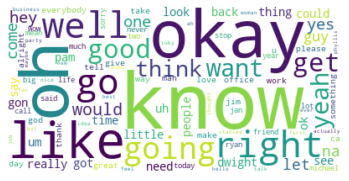

In [88]:
wc = WordCloud(background_color="white", max_words=100)
wc.generate_from_frequencies(word_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


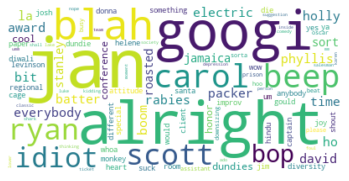

In [96]:
wc = WordCloud(background_color="white", max_words=100)
wc.generate_from_frequencies(tfidf_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()



In [107]:
michael_df = pd.DataFrame(tfidf_dict.items(), columns=['words', 'importance'])
michael_df.head()



,words,importance
0,jan,0.139388
1,alright,0.102312
2,googi,0.087675
3,blah,0.078879
4,beep,0.074146


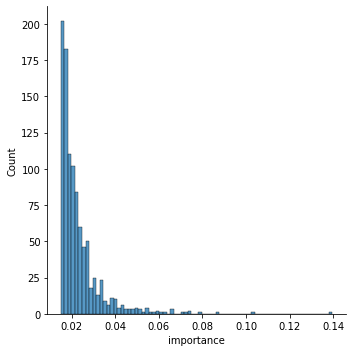

In [115]:
import seaborn as sns
michael_histogram = sns.displot(michael_df['importance'])

In [109]:
michael_histogram.savefig("michael_histogram.png")
